In [32]:
import os 

try:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/Othercomputers/Mein Laptop/WiSe 21-22/Innolab/Connectome Projekt/Connectome')
    train_path = '/content/drive/Othercomputers/Mein Laptop/WiSe 21-22/Innolab/data/delcode/train.csv'
    test_path = '/content/drive/Othercomputers/Mein Laptop/WiSe 21-22/Innolab/data/delcode/test.csv'
    IN_COLAB = True
except:
    os.chdir(r'C:\Users\leosc\OneDrive\Desktop\WiSe 21-22\Innolab\Connectome Projekt\Connectome')
    train_path = r'C:\Users\leosc\OneDrive\Desktop\WiSe 21-22\Innolab\data\delcode\train.csv'
    test_path = r'C:\Users\leosc\OneDrive\Desktop\WiSe 21-22\Innolab\data\delcode\test.csv'
    IN_COLAB = False

!pip install .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing /content/drive/Othercomputers/Mein Laptop/WiSe 21-22/Innolab/Connectome Projekt/Connectome
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for src: filename=src-0.1.0-py3-none-any.whl size=29178 sha256=4c717444b50401b52b2f4c833ef1848004f2a44c1b2fc15f38f8ed726a08d962
  Stored in directory: /tmp/pip-ephem-wheel-cache-dk1x45ie/wheels/33/78/f1/218471f49448b8e9df2af6ab9b92633a6fe2826c87471eba83
Successfully built src
  Attempting uninstall: src
    Found existing installation: src 0.1.0
    Unins

### Importing Libraries

In [33]:
!pip install bayesian-optimization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb 
from bayes_opt import BayesianOptimization
from typing import Union

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, \
    recall_score, f1_score, roc_auc_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import scipy.stats
import src.preprocessing.data_loader as dtl
from math import sqrt
from datetime import date

plt.style.use("ggplot")
%matplotlib inline

### Loading and Transforming Data

In [44]:
%%time
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

CPU times: user 18.9 s, sys: 638 ms, total: 19.6 s
Wall time: 20.3 s


In [35]:
y, X = dtl.preprocess_data(train)
X = X.drop(columns = ['MEM_score', 'Apoe'], inplace = False)
y_test, X_test = dtl.preprocess_data(test)
X_test = X_test.drop(columns = ['MEM_score', 'Apoe'], inplace = False)
del train, test

### Baseline Model (XGB Untuned Classifier)

In [36]:
%%time
lgb_baseline = lgb.LGBMClassifier(tree_method='gpu_hist')
lgb_baseline.fit(X,y)

CPU times: user 3min 31s, sys: 2.02 s, total: 3min 33s
Wall time: 56.3 s


In [37]:
lgb_baseline

LGBMClassifier(tree_method='gpu_hist')

Text(0, 0.5, 'Feature Importance Score')

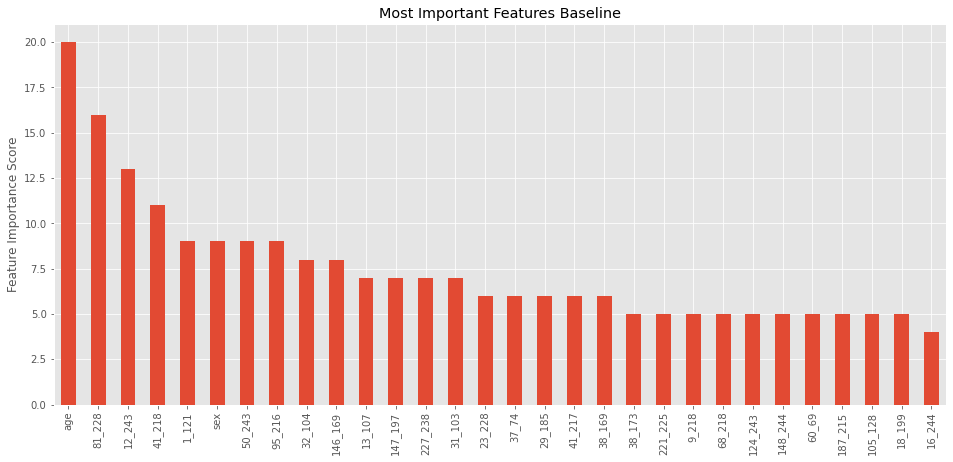

In [38]:
features = list(X.columns)
feat_imp = pd.Series(lgb_baseline.feature_importances_, features).sort_values(ascending=False)
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(7)
feat_imp[0:30].plot(kind='bar', title='Most Important Features Baseline')
plt.ylabel('Feature Importance Score')


In [39]:
print('Accuracy of the GBM on test set: {:.3f}'.format(lgb_baseline.score(X_test, y_test)), "\n")
pred = lgb_baseline.predict(X_test)
print("Classification Report - Baseline [Test]")
print(classification_report(y_test, pred))
del lgb_baseline

Accuracy of the GBM on test set: 0.765 

Classification Report - Baseline [Test]
              precision    recall  f1-score   support

         0.0       0.77      0.65      0.71        37
         1.0       0.76      0.85      0.80        48

    accuracy                           0.76        85
   macro avg       0.77      0.75      0.75        85
weighted avg       0.77      0.76      0.76        85



### BO

In [ ]:
res = hpo_lgbm(X, y, n_folds=2, init_points=2, n_iter=1, save_model=False)

In [ ]:
print('Accuracy of the GBM on test set: {:.3f}'.format(lgb_tuned.score(X_test, y_test)), "\n")
pred = lgb_tuned.predict(X_test)
print("Classification Report - Baseline [Test]")
print(classification_report(y_test, pred))

In [50]:
def test_pip():
    os.system("!pip install keras")
test_pip()

In [51]:
test_pip()